# Data Preprocessing Tools

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from numpy import sqrt, argmax
from sklearn.compose import make_column_transformer, make_column_selector,ColumnTransformer
# from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,StandardScaler
from sklearn.utils import resample
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold
from sklearn.linear_model import LogisticRegression
# from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, recall_score, classification_report, roc_auc_score, roc_curve
# from imblearn.over_sampling import SMOTE
# from sklearn.decomposition import PCA

## Importing the dataset

In [2]:
dataset = pd.read_csv('term-deposit-marketing-2020.csv')

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        40000 non-null  int64 
 1   job        40000 non-null  object
 2   marital    40000 non-null  object
 3   education  40000 non-null  object
 4   default    40000 non-null  object
 5   balance    40000 non-null  int64 
 6   housing    40000 non-null  object
 7   loan       40000 non-null  object
 8   contact    40000 non-null  object
 9   day        40000 non-null  int64 
 10  month      40000 non-null  object
 11  duration   40000 non-null  int64 
 12  campaign   40000 non-null  int64 
 13  y          40000 non-null  object
dtypes: int64(5), object(9)
memory usage: 4.3+ MB


## Encoding categorical data

In [3]:
dataset['y'] = dataset['y'].map(lambda x: 0 if x == 'no' else 1)
dataset['default'] = dataset['default'].map(lambda x: 0 if x == 'no' else 1)
dataset['housing'] = dataset['housing'].map(lambda x: 0 if x == 'no' else 1)
dataset['loan'] = dataset['loan'].map(lambda x: 0 if x == 'no' else 1)

In [4]:
dataset.describe()

,age,default,balance,housing,loan,day,duration,campaign,y
count,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000
mean,40.544600,0.020225,1274.277550,0.600775,0.173250,16.017225,254.824300,2.882175,0.072400
std,9.641776,0.140771,2903.769716,0.489745,0.378468,8.278127,259.366498,3.239051,0.259152
min,19.000000,0.000000,-8019.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,33.000000,0.000000,54.000000,0.000000,0.000000,8.000000,100.000000,1.000000,0.000000
50%,39.000000,0.000000,407.000000,1.000000,0.000000,17.000000,175.000000,2.000000,0.000000
75%,48.000000,0.000000,1319.000000,1.000000,0.000000,21.000000,313.000000,3.000000,0.000000
max,95.000000,1.000000,102127.000000,1.000000,1.000000,31.000000,4918.000000,63.000000,1.000000


In [5]:
print(dataset.head())

print(dataset.info())

print(dataset['y'].value_counts())

   age           job  marital  education  default  balance  housing  loan   
0   58    management  married   tertiary        0     2143        1     0  \
1   44    technician   single  secondary        0       29        1     0   
2   33  entrepreneur  married  secondary        0        2        1     1   
3   47   blue-collar  married    unknown        0     1506        1     0   
4   33       unknown   single    unknown        0        1        0     0   

   contact  day month  duration  campaign  y  
0  unknown    5   may       261         1  0  
1  unknown    5   may       151         1  0  
2  unknown    5   may        76         1  0  
3  unknown    5   may        92         1  0  
4  unknown    5   may       198         1  0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        40000 non-null  int64 
 1   job        40000 non-nul

In [6]:
categorical_columns_subset = [
    "job",
    "marital",
    "education",
    "contact",
    "month"
    ]

numerical_columns_subset = [
    "age",
    "default",
    "balance",
    "housing",
    "loan",
    "day",
    "duration",
    "campaign","y"
    ]


In [7]:
X = dataset[categorical_columns_subset + numerical_columns_subset]
X[categorical_columns_subset] = X[categorical_columns_subset].astype("category")

categorical_columns = X.select_dtypes(include="category").columns
n_categorical_features = len(categorical_columns)
n_numerical_features = X.select_dtypes(include="number").shape[1]

print(f"Number of samples: {X.shape[0]}")
print(f"Number of features: {X.shape[1]}")
print(f"Number of categorical features: {n_categorical_features}")
print(f"Number of numerical features: {n_numerical_features}")

Number of samples: 40000
Number of features: 14
Number of categorical features: 5
Number of numerical features: 9


In [147]:
X.head()

,job,marital,education,contact,month,age,default,balance,housing,loan,day,duration,campaign,y
0,management,married,tertiary,unknown,may,58,0,2143,1,0,5,261,1,0
1,technician,single,secondary,unknown,may,44,0,29,1,0,5,151,1,0
2,entrepreneur,married,secondary,unknown,may,33,0,2,1,1,5,76,1,0
3,blue-collar,married,unknown,unknown,may,47,0,1506,1,0,5,92,1,0
4,unknown,single,unknown,unknown,may,33,0,1,0,0,5,198,1,0


In [150]:
X.shape, X.dtypes

((40000, 14),
 job          category
 marital      category
 education    category
 contact      category
 month        category
 age             int64
 default         int64
 balance         int64
 housing         int64
 loan            int64
 day             int64
 duration        int64
 campaign        int64
 y               int64
 dtype: object)

In [9]:
features = X.drop(columns=['y'])
y = dataset.iloc[:, -1]

In [10]:
print(features.head(), y.head(), features.shape, y.shape)

            job  marital  education  contact month  age  default  balance   
0    management  married   tertiary  unknown   may   58        0     2143  \
1    technician   single  secondary  unknown   may   44        0       29   
2  entrepreneur  married  secondary  unknown   may   33        0        2   
3   blue-collar  married    unknown  unknown   may   47        0     1506   
4       unknown   single    unknown  unknown   may   33        0        1   

   housing  loan  day  duration  campaign  
0        1     0    5       261         1  
1        1     0    5       151         1  
2        1     1    5        76         1  
3        1     0    5        92         1  
4        0     0    5       198         1   0    0
1    0
2    0
3    0
4    0
Name: y, dtype: int64 (40000, 13) (40000,)


##**Creating Histogram**

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'default'}>,
        <Axes: title={'center': 'balance'}>,
        <Axes: title={'center': 'housing'}>],
       [<Axes: title={'center': 'loan'}>,
        <Axes: title={'center': 'day'}>,
        <Axes: title={'center': 'duration'}>,
        <Axes: title={'center': 'campaign'}>]], dtype=object)

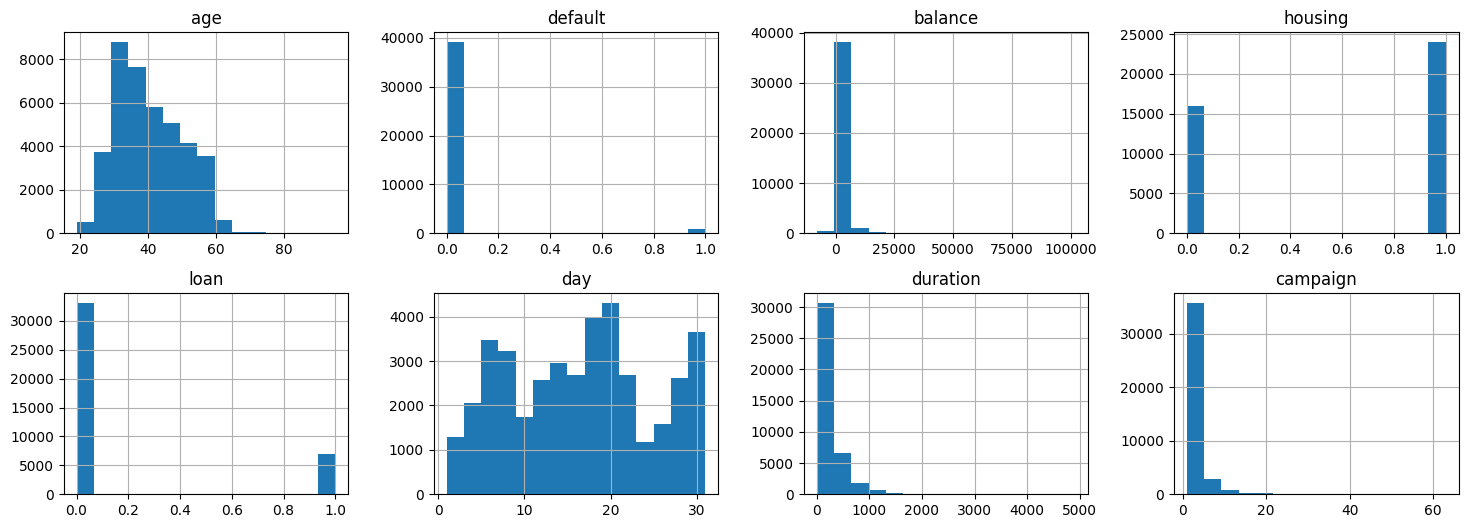

In [11]:
features.hist(bins=15, figsize=(18, 6), layout=(2, 4))

No huge correlation impact that affect the target results or perdictions

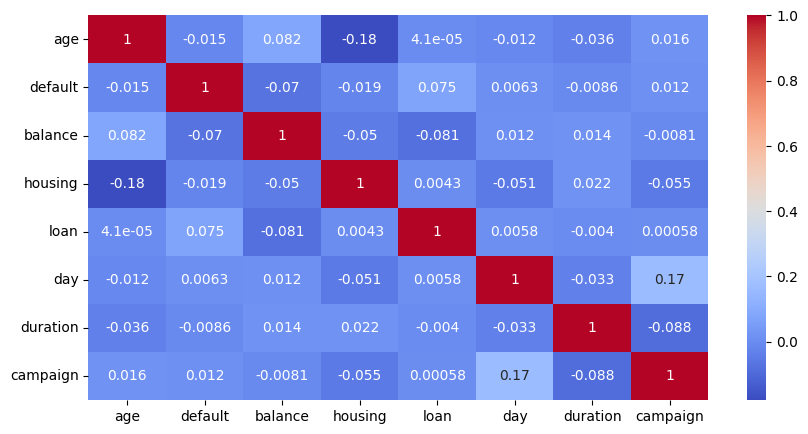

In [12]:
plt.figure(figsize = (10,5))
sns.heatmap(features.select_dtypes(include="number").corr(), annot = True, cmap="coolwarm")
plt.show()

y
0    37104
1     2896
Name: count, dtype: int64


<Axes: ylabel='count'>

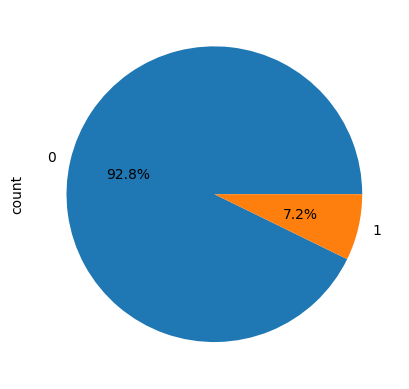

In [13]:
print(y.value_counts())

y.value_counts().plot(kind='pie', autopct='%1.1f%%')

##**Encoding the Dependent Variable**

In [14]:
ct = make_column_transformer(
    (OneHotEncoder(), make_column_selector(dtype_include="category")), remainder="passthrough")
features = ct.fit_transform(features)

In [15]:
features = pd.DataFrame(features)
print(features.head())
features.shape

    0    1    2    3    4    5    6    7    8    9   ...   31   32    33   34   
0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  58.0  0.0  \
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  ...  0.0  0.0  44.0  0.0   
2  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  33.0  0.0   
3  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  47.0  0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  33.0  0.0   

       35   36   37   38     39   40  
0  2143.0  1.0  0.0  5.0  261.0  1.0  
1    29.0  1.0  0.0  5.0  151.0  1.0  
2     2.0  1.0  1.0  5.0   76.0  1.0  
3  1506.0  1.0  0.0  5.0   92.0  1.0  
4     1.0  0.0  0.0  5.0  198.0  1.0  

[5 rows x 41 columns]


(40000, 41)

In [151]:
features.dtypes

0     float64
1     float64
2     float64
3     float64
4     float64
5     float64
6     float64
7     float64
8     float64
9     float64
10    float64
11    float64
12    float64
13    float64
14    float64
15    float64
16    float64
17    float64
18    float64
19    float64
20    float64
21    float64
22    float64
23    float64
24    float64
25    float64
26    float64
27    float64
28    float64
29    float64
30    float64
31    float64
32    float64
33    float64
34    float64
35    float64
36    float64
37    float64
38    float64
39    float64
40    float64
dtype: object

## Splitting the dataset into the Training set and Test set

In [16]:
X_train, X_test,  y_train, y_test = train_test_split(features, y.values, test_size = 0.2, random_state = 1)

In [17]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(32000, 41) (8000, 41) (32000,) (8000,)


In [18]:
X_train= pd.DataFrame(X_train)
print(X_train.head())
X_train.shape

        0    1    2    3    4    5    6    7    8    9   ...   31   32    33   
21721  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  ...  0.0  0.0  33.0  \
15576  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  41.0   
28716  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  27.0   
204    0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  ...  0.0  0.0  35.0   
36677  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  ...  0.0  0.0  46.0   

        34     35   36   37    38     39   40  
21721  0.0  268.0  0.0  0.0  19.0  255.0  1.0  
15576  0.0   98.0  0.0  1.0  21.0   97.0  6.0  
28716  0.0  116.0  0.0  0.0  30.0   46.0  1.0  
204    0.0    0.0  1.0  0.0   5.0  471.0  1.0  
36677  0.0  147.0  1.0  0.0  12.0  189.0  1.0  

[5 rows x 41 columns]


(32000, 41)

In [19]:
X_test = pd.DataFrame(X_test)
print(X_test.head())
X_test.shape

        0    1    2    3    4    5    6    7    8    9   ...   31   32    33   
3841   0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  57.0  \
12898  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  49.0   
15032  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  ...  0.0  0.0  37.0   
36781  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  ...  0.0  0.0  33.0   
9201   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  40.0   

        34      35   36   37    38     39   40  
3841   0.0   260.0  1.0  0.0  16.0   38.0  3.0  
12898  1.0  -354.0  0.0  1.0   7.0  455.0  1.0  
15032  1.0     0.0  1.0  0.0  17.0  158.0  1.0  
36781  0.0   177.0  1.0  1.0  12.0   22.0  8.0  
9201   0.0  1779.0  1.0  0.0   5.0   59.0  7.0  

[5 rows x 41 columns]


(8000, 41)

##**Dummy Classifier**

In [20]:
dummy = DummyClassifier(strategy='stratified')
dummy.fit(X_train, y_train)
y_dummy_pred = dummy.predict(X_test)

# checking unique labels
print('Unique predicted labels: ', (np.unique(y_dummy_pred)))

# checking accuracy
print('Test score: {:.2f} %'.format(accuracy_score(y_test, y_dummy_pred)*100))

Unique predicted labels:  [0 1]
Test score: 86.59 %


In [21]:
print('F1_score: {:.2f} %'.format(f1_score(y_test, y_dummy_pred)*100))

F1_score: 7.42 %


In [22]:
pd.DataFrame(confusion_matrix(y_test, y_dummy_pred))

,0,1
0,6884,551
1,522,43


In [23]:
y_pred_proba = dummy.predict_proba(X_test)

In [24]:
print(pd.DataFrame(y_pred_proba))

        0    1
0     1.0  0.0
1     1.0  0.0
2     1.0  0.0
3     1.0  0.0
4     1.0  0.0
...   ...  ...
7995  1.0  0.0
7996  1.0  0.0
7997  1.0  0.0
7998  0.0  1.0
7999  1.0  0.0

[8000 rows x 2 columns]


#**Modeling and selection**

##**Logistic Regression**

In [25]:
lg = LogisticRegression(solver='newton-cg')
lg.fit(X_train, y_train)

y_pred_lg = lg.predict(X_test)

print(y_pred_lg)
print('Test score: {:.2f} %'.format(accuracy_score(y_test, y_pred_lg)*100))

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/optimize/_linesearch.py:457: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/optimize/_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


[0 0 0 ... 0 0 0]
Test score: 93.75 %


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


In [26]:
predictions = pd.DataFrame(y_pred_lg)
predictions[0].value_counts()

0
0    7739
1     261
Name: count, dtype: int64

In [27]:
print(classification_report(y_test, y_pred_lg))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      7435
           1       0.62      0.29      0.39       565

    accuracy                           0.94      8000
   macro avg       0.79      0.64      0.68      8000
weighted avg       0.93      0.94      0.93      8000



In [28]:
print('F1_score: {:.2f} %'.format(f1_score(y_test, y_pred_lg)*100))

F1_score: 39.47 %


In [29]:
print('Recall: {:.2f} %'.format(recall_score(y_test, y_pred_lg)*100))

Recall: 28.85 %


In [30]:
pd.DataFrame(confusion_matrix(y_test,y_pred_lg))

,0,1
0,7337,98
1,402,163


In [31]:
y_pred_proba_lg = lg.predict_proba(X_test)

In [32]:
print(pd.DataFrame(y_pred_proba_lg))

             0         1
0     0.998595  0.001405
1     0.943514  0.056486
2     0.985445  0.014555
3     0.989305  0.010695
4     0.996165  0.003835
...        ...       ...
7995  0.961502  0.038498
7996  0.974109  0.025891
7997  0.981463  0.018537
7998  0.982378  0.017622
7999  0.955205  0.044795

[8000 rows x 2 columns]



##**RandomForest Classifier**

In [33]:
rfc = RandomForestClassifier(n_estimators=10)

rfc.fit(X_train, y_train)

# predict on test set
rfc_pred = rfc.predict(X_test)

print('Accuracy score: {:.2f} %'.format(accuracy_score(y_test, rfc_pred)*100))

Accuracy score: 93.42 %


In [34]:
print('F1_score: {:.2f} %'.format(f1_score(y_test, rfc_pred)*100))

F1_score: 37.38 %


In [35]:
print('Recall: {:.2f} %'.format(recall_score(y_test, rfc_pred)*100))

Recall: 27.79 %


In [36]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97      7435
           1       0.57      0.28      0.37       565

    accuracy                           0.93      8000
   macro avg       0.76      0.63      0.67      8000
weighted avg       0.92      0.93      0.92      8000



In [37]:
pd.DataFrame(confusion_matrix(y_test,rfc_pred))

,0,1
0,7317,118
1,408,157


In [38]:
y_pred_proba_rfc = rfc.predict_proba(X_test)

In [39]:
print(pd.DataFrame(y_pred_proba_rfc))

        0    1
0     1.0  0.0
1     1.0  0.0
2     1.0  0.0
3     1.0  0.0
4     0.9  0.1
...   ...  ...
7995  0.8  0.2
7996  1.0  0.0
7997  1.0  0.0
7998  1.0  0.0
7999  1.0  0.0

[8000 rows x 2 columns]


##**Decision Tree**

In [40]:
dtc = DecisionTreeClassifier(criterion='entropy', max_depth=6,min_samples_split= 2, splitter="random", random_state=0)
dtc.fit(X_train, y_train)

y_pred_dt = dtc.predict(X_test)

print('Accuracy score: {:.2f} %'.format(accuracy_score(y_test, y_pred_dt)*100))

Accuracy score: 93.62 %


In [41]:
print('F1_score: {:.2f} %'.format(f1_score(y_test, y_pred_dt)*100))

F1_score: 35.93 %


In [42]:
print('Recall: {:.2f} %'.format(recall_score(y_test, y_pred_dt)*100))

Recall: 25.31 %


In [43]:
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      7435
           1       0.62      0.25      0.36       565

    accuracy                           0.94      8000
   macro avg       0.78      0.62      0.66      8000
weighted avg       0.92      0.94      0.92      8000



In [44]:
pd.DataFrame(confusion_matrix(y_test,y_pred_dt))

,0,1
0,7347,88
1,422,143


In [45]:
y_pred_proba_dt = dtc.predict_proba(X_test)

In [46]:
print(pd.DataFrame(y_pred_proba_dt))

             0         1
0     0.994334  0.005666
1     0.762063  0.237937
2     0.994334  0.005666
3     0.994334  0.005666
4     0.994334  0.005666
...        ...       ...
7995  0.899083  0.100917
7996  0.994334  0.005666
7997  0.994334  0.005666
7998  0.994334  0.005666
7999  0.987952  0.012048

[8000 rows x 2 columns]


##**XGBoost**

In [47]:
xgb = XGBClassifier()
xgb.fit(X_train,y_train)

y_pred_xgb = xgb.predict(X_test)

print('Accuracy score: {:.2f} %'.format(accuracy_score(y_test, y_pred_dt)*100))

Accuracy score: 93.62 %


In [48]:
print('F1 score: {:.2f} %'.format(f1_score(y_test, y_pred_xgb)*100))

F1 score: 49.74 %


In [49]:
print(classification_report(y_test,y_pred_xgb))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      7435
           1       0.60      0.43      0.50       565

    accuracy                           0.94      8000
   macro avg       0.78      0.70      0.73      8000
weighted avg       0.93      0.94      0.93      8000



In [50]:
print(confusion_matrix(y_test, y_pred_xgb))

[[7272  163]
 [ 324  241]]


In [51]:
y_pred_proba_xgb = xgb.predict_proba(X_test)

In [52]:
print(pd.DataFrame(y_pred_proba_xgb))

             0         1
0     0.999807  0.000193
1     0.935862  0.064138
2     0.997917  0.002083
3     0.999938  0.000062
4     0.999952  0.000048
...        ...       ...
7995  0.963450  0.036550
7996  0.996989  0.003011
7997  0.998714  0.001286
7998  0.999753  0.000247
7999  0.939456  0.060544

[8000 rows x 2 columns]


##**Oversampling**

###**Resampling to 50% of dataset**

In [53]:
y_0 = y_train==0
y_1 = y_train==1

# upsample minority
y_upsampled = resample(y_1,
                          replace=True, # sample with replacement
                          n_samples=int(len(y_0)/3), # match number in majority class
                          random_state=1) # reproducible results

# combine majority and upsampled minority
upsampled = np.concatenate([y_0, y_upsampled])

# convert to DataFrame
upsampled= pd.DataFrame(upsampled)

# check new class counts
upsampled.value_counts()

True     30425
False    12241
Name: count, dtype: int64

In [54]:
print(X_train.head())

        0    1    2    3    4    5    6    7    8    9   ...   31   32    33   
21721  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  ...  0.0  0.0  33.0  \
15576  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  41.0   
28716  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  27.0   
204    0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  ...  0.0  0.0  35.0   
36677  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  ...  0.0  0.0  46.0   

        34     35   36   37    38     39   40  
21721  0.0  268.0  0.0  0.0  19.0  255.0  1.0  
15576  0.0   98.0  0.0  1.0  21.0   97.0  6.0  
28716  0.0  116.0  0.0  0.0  30.0   46.0  1.0  
204    0.0    0.0  1.0  0.0   5.0  471.0  1.0  
36677  0.0  147.0  1.0  0.0  12.0  189.0  1.0  

[5 rows x 41 columns]


In [55]:
print(X_test.head())
X_test.shape

        0    1    2    3    4    5    6    7    8    9   ...   31   32    33   
3841   0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  57.0  \
12898  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  49.0   
15032  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  ...  0.0  0.0  37.0   
36781  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  ...  0.0  0.0  33.0   
9201   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  40.0   

        34      35   36   37    38     39   40  
3841   0.0   260.0  1.0  0.0  16.0   38.0  3.0  
12898  1.0  -354.0  0.0  1.0   7.0  455.0  1.0  
15032  1.0     0.0  1.0  0.0  17.0  158.0  1.0  
36781  0.0   177.0  1.0  1.0  12.0   22.0  8.0  
9201   0.0  1779.0  1.0  0.0   5.0   59.0  7.0  

[5 rows x 41 columns]


(8000, 41)

###**Logistic Regression (Upsampling)**

In [56]:
class_weights = {0: 1, 1: 3}
upsampled_lg = LogisticRegression(solver='newton-cg', class_weight = class_weights)
upsampled_lg.fit(X_train, y_train)

upsampled_pred_lg = upsampled_lg.predict(X_test)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/optimize/_linesearch.py:457: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/optimize/_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


In [57]:
print('Accuracy score: {:.2f} %'.format(accuracy_score(y_test, upsampled_pred_lg)*100))

Accuracy score: 93.16 %


In [58]:
print('F1 score: {:.2f} %'.format(f1_score(y_test, upsampled_pred_lg)*100))

F1 score: 53.37 %


In [59]:
print(classification_report(y_test, upsampled_pred_lg))

              precision    recall  f1-score   support

           0       0.97      0.96      0.96      7435
           1       0.51      0.55      0.53       565

    accuracy                           0.93      8000
   macro avg       0.74      0.76      0.75      8000
weighted avg       0.93      0.93      0.93      8000



In [60]:
print(pd.DataFrame(confusion_matrix(y_test,upsampled_pred_lg)))

      0    1
0  7140  295
1   252  313


In [61]:
print('Recall score: {:.2f} %'.format(recall_score(y_test, upsampled_pred_lg)*100))

Recall score: 55.40 %


In [62]:
upsampled_pred_proba_lg = upsampled_lg.predict_proba(X_test)
lr_probs = upsampled_pred_proba_lg[:, 1]  # Probability of the positive class

In [63]:
lr_auc = roc_auc_score(y_test, lr_probs)
print(lr_auc)

0.9336132023257614


In [64]:
# Define a range of threshold values to experiment with
thresholds = np.arange(0.1, 1.0, 0.1)

# Play with different threshold values
for threshold in thresholds:
    # Convert probabilities to binary predictions based on the threshold
    y_pred_lr_th = (lr_probs >= threshold).astype(int)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred_lr_th)
    f1 = f1_score(y_test, y_pred_lr_th)

    # Print the evaluation metrics for each threshold
    print(f"Threshold: {threshold:.1f}",f"Accuracy: {accuracy:.2f}",f"F1-score: {f1:.2f}")

Threshold: 0.1 Accuracy: 0.77 F1-score: 0.37
Threshold: 0.2 Accuracy: 0.88 F1-score: 0.50
Threshold: 0.3 Accuracy: 0.91 F1-score: 0.53
Threshold: 0.4 Accuracy: 0.92 F1-score: 0.55
Threshold: 0.5 Accuracy: 0.93 F1-score: 0.53
Threshold: 0.6 Accuracy: 0.94 F1-score: 0.52
Threshold: 0.7 Accuracy: 0.94 F1-score: 0.47
Threshold: 0.8 Accuracy: 0.94 F1-score: 0.40
Threshold: 0.9 Accuracy: 0.94 F1-score: 0.31


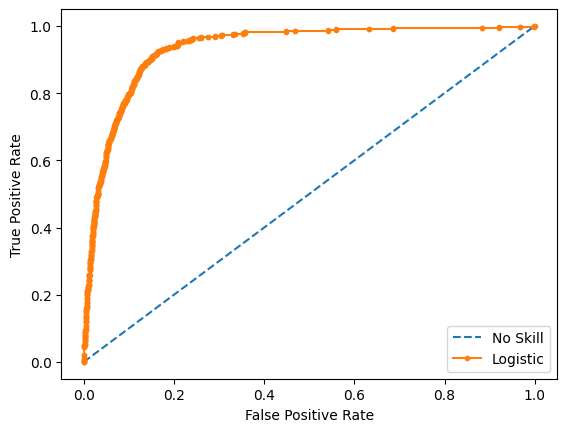

In [65]:
fpr, tpr, thresholds = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='Logistic')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()

Best Threshold=0.155746, G-Mean=0.879


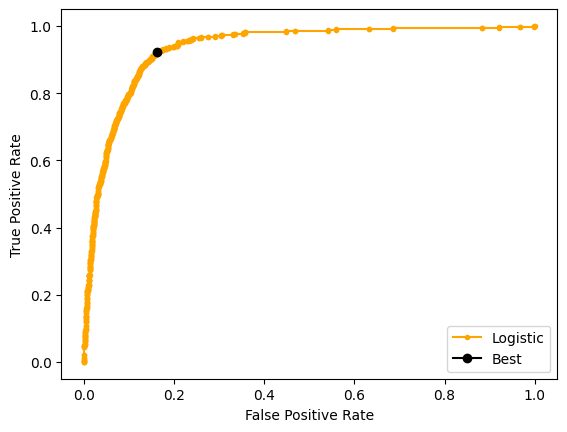

In [66]:
# calculate the g-mean for each threshold
gmeans = sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.', color='orange', label='Logistic')
plt.plot(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()

###**Decision Tree (Upsampling)**

In [67]:
class_weights = {0: 1, 1: 3}
upsampled_dt = DecisionTreeClassifier(criterion='entropy', class_weight = class_weights, max_depth=6,min_samples_split= 2, splitter="random", random_state=0)
upsampled_dt.fit(X_train, y_train)

upsampled_pred_dt = upsampled_dt.predict(X_test)

In [68]:
print('Accuracy score: {:.2f} %'.format(accuracy_score(y_test, upsampled_pred_dt)*100))

Accuracy score: 88.41 %


In [69]:
print(classification_report(y_test, upsampled_pred_dt))

              precision    recall  f1-score   support

           0       0.98      0.90      0.93      7435
           1       0.35      0.73      0.47       565

    accuracy                           0.88      8000
   macro avg       0.66      0.81      0.70      8000
weighted avg       0.93      0.88      0.90      8000



In [70]:
print('F1 score: {:.2f} %'.format(f1_score(y_test, upsampled_pred_dt)*100))

F1 score: 47.00 %


In [71]:
print(pd.DataFrame(confusion_matrix(y_test,upsampled_pred_dt)))

      0    1
0  6662  773
1   154  411


In [72]:
print('Recall score: {:.2f} %'.format(recall_score(y_test, upsampled_pred_dt)*100))

Recall score: 72.74 %


In [73]:
upsampled_pred_proba_dt = upsampled_dt.predict_proba(X_test)
dt_probs = upsampled_pred_proba_dt[:, 1]

In [75]:
# Define a range of threshold values to experiment with
thresholds = np.arange(0.1, 1.0, 0.1)

# Play with different threshold values
for threshold in thresholds:
    # Convert probabilities to binary predictions based on the threshold
    y_pred_dt_th = (dt_probs >= threshold).astype(int)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred_dt_th)
    f1 = f1_score(y_test, y_pred_dt_th)

    # Print the evaluation metrics for each threshold
    print(f"Threshold: {threshold:.1f}",f"Accuracy: {accuracy:.2f}",f"F1-score: {f1:.2f}")

Threshold: 0.1 Accuracy: 0.78 F1-score: 0.37
Threshold: 0.2 Accuracy: 0.84 F1-score: 0.43
Threshold: 0.3 Accuracy: 0.87 F1-score: 0.47
Threshold: 0.4 Accuracy: 0.87 F1-score: 0.47
Threshold: 0.5 Accuracy: 0.88 F1-score: 0.47
Threshold: 0.6 Accuracy: 0.93 F1-score: 0.39
Threshold: 0.7 Accuracy: 0.94 F1-score: 0.37
Threshold: 0.8 Accuracy: 0.94 F1-score: 0.33
Threshold: 0.9 Accuracy: 0.93 F1-score: 0.09


In [76]:
dt_auc = roc_auc_score(y_test, dt_probs)
print(dt_auc)

0.9043352714677647


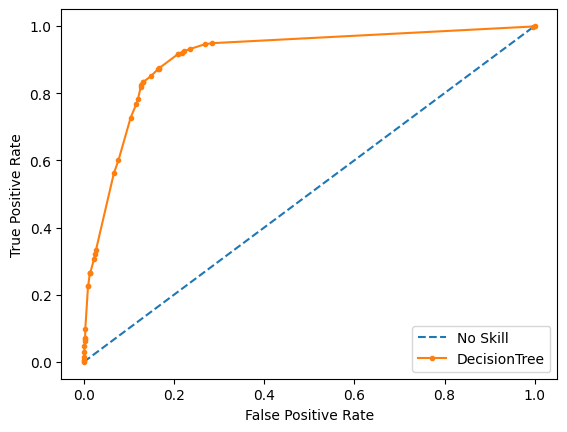

In [77]:
fpr, tpr, thresholds = roc_curve(y_test, dt_probs)
# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='DecisionTree')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()

Best Threshold=0.228070, G-Mean=0.853


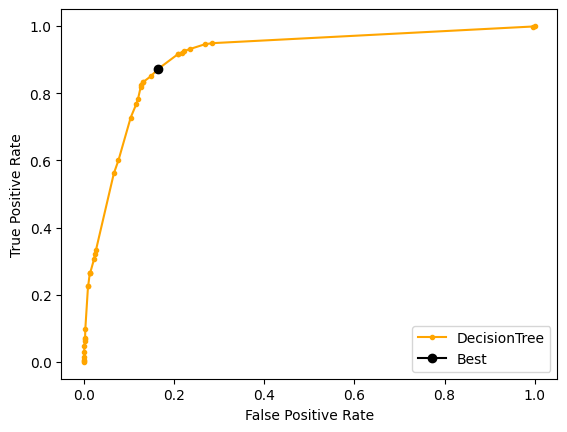

In [78]:
# calculate the g-mean for each threshold
gmeans = sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.', color='orange', label='DecisionTree')
plt.plot(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()

###**Random Forest (Upsampling)**

In [79]:
class_weights = {0: 1, 1: 3}
upsampled_rfc = RandomForestClassifier(n_estimators=30, class_weight = class_weights, criterion='entropy', max_depth=14, min_samples_split=8, random_state=0)
upsampled_rfc.fit(X_train, y_train)

upsampled_pred_rfc = upsampled_rfc.predict(X_test)

In [80]:
print('Accuracy score: {:.2f} %'.format(accuracy_score(y_test, upsampled_pred_rfc)*100))

Accuracy score: 93.69 %


In [81]:
print(classification_report(y_test, upsampled_pred_rfc))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      7435
           1       0.55      0.55      0.55       565

    accuracy                           0.94      8000
   macro avg       0.76      0.76      0.76      8000
weighted avg       0.94      0.94      0.94      8000



In [82]:
print('F1 score: {:.2f} %'.format(f1_score(y_test, upsampled_pred_rfc)*100))

F1 score: 55.19 %


In [83]:
print(pd.DataFrame(confusion_matrix(y_test,upsampled_pred_rfc)))

      0    1
0  7184  251
1   254  311


In [84]:
print('Recall score: {:.2f} %'.format(recall_score(y_test, upsampled_pred_rfc)*100))

Recall score: 55.04 %


In [85]:
upsampled_pred_proba_rfc = upsampled_rfc.predict_proba(X_test)
rfc_probs = upsampled_pred_proba_rfc[:, 1]

In [86]:
rfc_auc = roc_auc_score(y_test, rfc_probs)
print(rfc_auc)

0.950101826448691


In [155]:
# Define a range of threshold values to experiment with
thresholds = np.arange(0.1, 1.0, 0.1)

# Play with different threshold values
for threshold in thresholds:
    # Convert probabilities to binary predictions based on the threshold
    y_pred_rf_th = (rfc_probs >= threshold).astype(int)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred_rf_th)
    f1 = f1_score(y_test, y_pred_rf_th)

    # Print the evaluation metrics for each threshold
    print(f"Threshold: {threshold:.1f}",f"Accuracy: {accuracy:.4f}",f"F1-score: {f1:.4f}")

Threshold: 0.1 Accuracy: 0.8124 F1-score: 0.4216
Threshold: 0.2 Accuracy: 0.8825 F1-score: 0.5214
Threshold: 0.3 Accuracy: 0.9099 F1-score: 0.5612
Threshold: 0.4 Accuracy: 0.9273 F1-score: 0.5721
Threshold: 0.5 Accuracy: 0.9369 F1-score: 0.5519
Threshold: 0.6 Accuracy: 0.9379 F1-score: 0.4371
Threshold: 0.7 Accuracy: 0.9340 F1-score: 0.2072
Threshold: 0.8 Accuracy: 0.9300 F1-score: 0.0210
Threshold: 0.9 Accuracy: 0.9294 F1-score: 0.0000


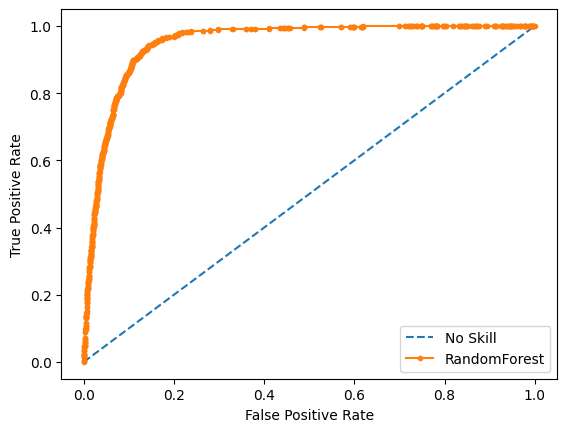

In [88]:
fpr, tpr, thresholds = roc_curve(y_test, rfc_probs)
# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='RandomForest')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()

Best Threshold=0.156748, gmeans=0.90


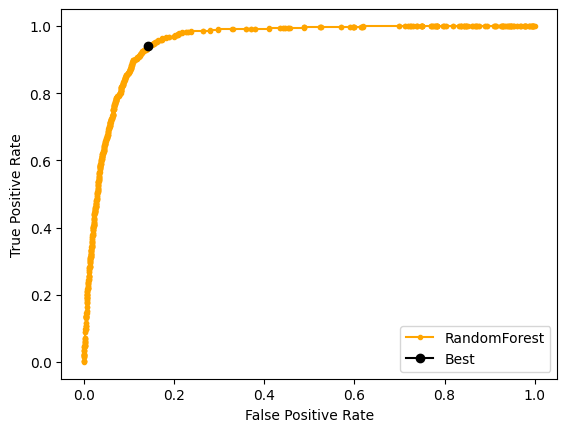

In [89]:
# calculate the g-mean for each threshold
gmeans = sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = argmax(gmeans)
print('Best Threshold=%f, gmeans=%.2f' % (thresholds[ix], gmeans[ix]))
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.', color= 'orange', label='RandomForest')
plt.plot(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()

###**SVM Classifier (Upsampling)**

In [90]:
class_weights = {0: 1, 1: 3}
sv = SVC(kernel="rbf", class_weight = class_weights, random_state=0, probability=True)
sv.fit(X_train,y_train)

y_pred_sv = sv.predict(X_test)

In [91]:
print('Accuracy score: {:.2f} %'.format(accuracy_score(y_test, y_pred_sv)*100))

Accuracy score: 93.12 %


In [92]:
print(classification_report(y_test, y_pred_sv))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96      7435
           1       0.52      0.42      0.46       565

    accuracy                           0.93      8000
   macro avg       0.74      0.69      0.71      8000
weighted avg       0.93      0.93      0.93      8000



In [93]:
print('F1 score: {:.2f} %'.format(f1_score(y_test, y_pred_sv)*100))

F1 score: 46.08 %


In [94]:
print(pd.DataFrame(confusion_matrix(y_test,y_pred_sv)))

      0    1
0  7215  220
1   330  235


In [95]:
print('Recall score: {:.2f} %'.format(recall_score(y_test, y_pred_sv)*100))

Recall score: 41.59 %


In [96]:
upsampled_pred_proba_sv = sv.predict_proba(X_test)
sv_probs = upsampled_pred_proba_sv[:, 1]

In [97]:
sv_auc = roc_auc_score(y_test, sv_probs)
print(sv_auc)

0.8731400753432402


In [98]:
# Define a range of threshold values to experiment with
thresholds = np.arange(0.1, 1.0, 0.1)

# Play with different threshold values
for threshold in thresholds:
    # Convert probabilities to binary predictions based on the threshold
    y_pred_sv_th = (sv_probs >= threshold).astype(int)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred_sv_th)
    f1 = f1_score(y_test, y_pred_sv_th)

    # Print the evaluation metrics for each threshold
    print(f"Threshold: {threshold:.1f}",f"Accuracy: {accuracy:.4f}",f"F1-score: {f1:.4f}")

Threshold: 0.1 Accuracy: 0.8989 F1-score: 0.4730
Threshold: 0.2 Accuracy: 0.9291 F1-score: 0.4765
Threshold: 0.3 Accuracy: 0.9341 F1-score: 0.4266
Threshold: 0.4 Accuracy: 0.9351 F1-score: 0.3678
Threshold: 0.5 Accuracy: 0.9347 F1-score: 0.3238
Threshold: 0.6 Accuracy: 0.9331 F1-score: 0.2621
Threshold: 0.7 Accuracy: 0.9324 F1-score: 0.2193
Threshold: 0.8 Accuracy: 0.9317 F1-score: 0.1677
Threshold: 0.9 Accuracy: 0.9313 F1-score: 0.1100


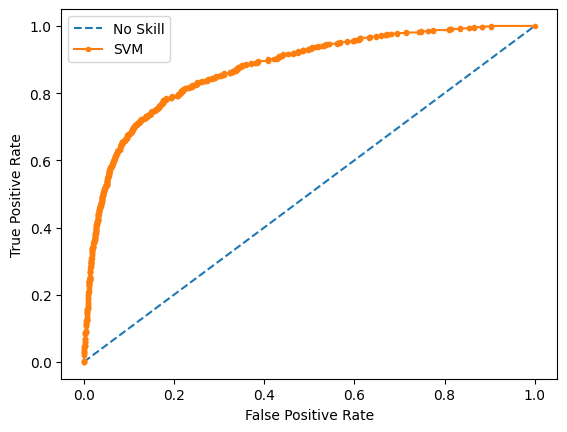

In [99]:
fpr, tpr, thresholds = roc_curve(y_test, sv_probs)
# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='SVM')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()

###**XGBoost Classifier (Upsampling)**

In [100]:
class_weights = np.array([1, 3])
xg = XGBClassifier(scale_pos_weight=class_weights[1], random_state=42)  
## Here class_weight[1] means 3 which is giving thrice the weight to class '1'.
xg.fit(X_train,y_train)

y_pred_xg = xg.predict(X_test)

In [101]:
print('Accuracy score: {:.2f} %'.format(accuracy_score(y_test, y_pred_xg)*100))

Accuracy score: 93.34 %


In [102]:
print(classification_report(y_test, y_pred_xg))

              precision    recall  f1-score   support

           0       0.97      0.96      0.96      7435
           1       0.52      0.62      0.57       565

    accuracy                           0.93      8000
   macro avg       0.75      0.79      0.77      8000
weighted avg       0.94      0.93      0.94      8000



In [103]:
print('F1 score: {:.2f} %'.format(f1_score(y_test, y_pred_xg)*100))

F1 score: 56.98 %


In [104]:
print(pd.DataFrame(confusion_matrix(y_test,y_pred_xg)))

      0    1
0  7114  321
1   212  353


In [105]:
upsampled_pred_proba_xg = xg.predict_proba(X_test)
xg_probs = upsampled_pred_proba_xg[:, 1]

In [106]:
xg_auc = roc_auc_score(y_test,xg_probs)
print(xg_auc)

0.948363218691789


In [107]:
# Define a range of threshold values to experiment with
thresholds = np.arange(0.1, 1.0, 0.1)

# Play with different threshold values
for threshold in thresholds:
    # Convert probabilities to binary predictions based on the threshold
    y_pred_xg_th = (xg_probs >= threshold).astype(int)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred_xg_th)
    f1 = f1_score(y_test, y_pred_xg_th)

    # Print the evaluation metrics for each threshold
    print(f"Threshold: {threshold:.1f}",f"Accuracy: {accuracy:.4f}",f"F1-score: {f1:.4f}")

Threshold: 0.1 Accuracy: 0.8651 F1-score: 0.4908
Threshold: 0.2 Accuracy: 0.9002 F1-score: 0.5486
Threshold: 0.3 Accuracy: 0.9180 F1-score: 0.5757
Threshold: 0.4 Accuracy: 0.9255 F1-score: 0.5700
Threshold: 0.5 Accuracy: 0.9334 F1-score: 0.5698
Threshold: 0.6 Accuracy: 0.9373 F1-score: 0.5411
Threshold: 0.7 Accuracy: 0.9393 F1-score: 0.4959
Threshold: 0.8 Accuracy: 0.9370 F1-score: 0.3793
Threshold: 0.9 Accuracy: 0.9333 F1-score: 0.1909


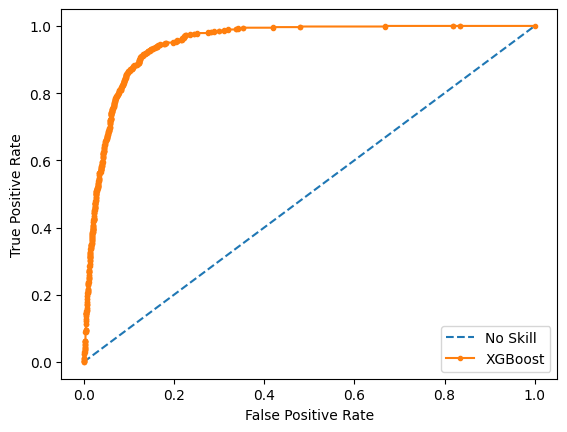

In [108]:
fpr, tpr, thresholds = roc_curve(y_test, xg_probs)
# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='XGBoost')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()

# Comparing all F1 Scores results for all Models

In [162]:
print("f1 score for Logistic regression: ", f1_score(y_test,upsampled_pred_lg))
print("f1 score for Decision Tree: ", f1_score(y_test,upsampled_pred_dt))
print("f1 score for Random Forest: ", f1_score(y_test,upsampled_pred_rfc))
print("f1 score for SVM: ", f1_score(y_test,y_pred_sv))
print("f1 score for XGBoost: ", f1_score(y_test,y_pred_xg))

f1 score for Logistic regression:  0.5336743393009378
f1 score for Decision Tree:  0.469982847341338
f1 score for Random Forest:  0.5519077196095831
f1 score for SVM:  0.46078431372549017
f1 score for XGBoost:  0.569814366424536


In [ ]:
# Based on the above, we find that XGBoost has the best f1_score of 57% 

#**Cross Vaidation using GridSearch**

##**Logistic Regression Upsampling Cross Validation**

In [109]:
params = {'C':[0.1,0.01,0.02,0.3,0.0015,1],'class_weight' : ['balanced',{0: 1, 1: 3}], 'solver':["lbfgs", "liblinear", "newton-cg", "newton-cholesky", "sag", "saga"]}
grid_search_Ulg = GridSearchCV(estimator= upsampled_lg, param_grid=params, cv= 5 , scoring='f1', n_jobs = -1)
grid_search_Ulg.fit(X_train, y_train)
best_accuracy_Ulg = grid_search_Ulg.best_score_
best_params_Ulg = grid_search_Ulg.best_params_
print("Best f1_Score for Upsampling Logistisc regression: {:.2f}%".format(best_accuracy_Ulg*100))
print("Best params for Upsampling Logistisc regression: ",best_params_Ulg)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sciki

Best f1_Score for Upsampling Logistisc regression: 52.67%
Best params for Upsampling Logistisc regression:  {'C': 1, 'class_weight': {0: 1, 1: 3}, 'solver': 'liblinear'}


In [110]:
accuracies_Ulg = cross_val_score(estimator = upsampled_lg, X = X_train, y = y_train, cv = 5)
print("Upsampled Logistic Regression Accuracy: {:.2f} %".format(accuracies_Ulg.mean()*100))
print("Upsampled Logistic Regression Standard Deviation: {:.2f} %".format(accuracies_Ulg.std()*100))

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/optimize/_linesearch.py:457: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/optimize/_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/optimize/_linesearch.py:457: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/optimize/_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


Upsampled Logistic Regression Accuracy: 92.77 %
Upsampled Logistic Regression Standard Deviation: 0.18 %


##**DecisionTree Upsampling Cross Validation**

In [111]:
params = {'max_depth': [4,5,6,7,8,9,10,12,14,20,50],'class_weight' : ['balanced',{0: 1, 1: 3}], 'criterion':['entropy','gini'], 'splitter':["random","best"], 'min_samples_split':[2,4,6,8,10,12]}
grid_search_dt = GridSearchCV(estimator= upsampled_dt, param_grid=params, cv= 5 , scoring='f1', n_jobs = -1)
grid_search_dt.fit(X_train, y_train)
best_accuracy_dt = grid_search_dt.best_score_
best_params_dt = grid_search_dt.best_params_
print("Best f1_Score for DecisionTree: {:.2f}%".format(best_accuracy_dt*100))
print("Best params for DecisionTree: ",best_params_dt)

Best f1_Score for DecisionTree: 54.85%
Best params for DecisionTree:  {'class_weight': {0: 1, 1: 3}, 'criterion': 'gini', 'max_depth': 7, 'min_samples_split': 6, 'splitter': 'best'}


In [112]:
accuracies_Udt = cross_val_score(estimator = upsampled_dt, X = X_train, y = y_train, cv = 5)
print("Upsampled DecisionTree Accuracy: {:.2f} %".format(accuracies_Udt.mean()*100))
print("Upsampled DecisionTree Standard Deviation: {:.2f} %".format(accuracies_Udt.std()*100))

Upsampled DecisionTree Accuracy: 92.43 %
Upsampled DecisionTree Standard Deviation: 0.42 %


##**RandomForest Upsampling Cross Validation**

In [113]:
# class_weights = 
params = {'n_estimators': [10, 20, 25, 50, 100],'class_weight' : ['balanced',{0: 1, 1: 3}], 
          'max_depth': [4,5,6,7,8,9,10,12,14,20,50], 'criterion':['entropy','gini'], 'min_samples_split':[2,4,6,8,10,12]}
grid_search_rd = GridSearchCV(estimator= upsampled_rfc, param_grid=params, cv= 5 , scoring='f1', n_jobs = -1)
grid_search_rd.fit(X_train, y_train)
best_accuracy_rd = grid_search_rd.best_score_
best_params_rd = grid_search_rd.best_params_
print("Best f1_Score for RandomForest: {:.2f}%".format(best_accuracy_rd*100))
print("Best params for RandomForest: ",best_params_rd)

Best f1_Score for RandomForest: 56.74%
Best params for RandomForest:  {'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 50, 'min_samples_split': 12, 'n_estimators': 100}


In [114]:
accuracies_Urfc = cross_val_score(estimator = upsampled_rfc, X = X_train, y = y_train, cv = 5)
print("Upsampled Random Forest Accuracy: {:.2f} %".format(accuracies_Urfc.mean()*100))
print("Upsampled Random Forest Standard Deviation: {:.2f} %".format(accuracies_Urfc.std()*100))

Upsampled Random Forest Accuracy: 93.29 %
Upsampled Random Forest Standard Deviation: 0.21 %


##**XGBoost Upsampling Cross Validation**

In [116]:
class_weights = np.array([1, 3])
params = {'objective': ['binary:logitraw', 'binary:logistic','reg:logistic'],'eval_metric': ['rmse','logloss'], 'max_depth': [5,10,20], 
          'scale_pos_weight':['balanced',class_weights[1]]}
grid_search_xg = GridSearchCV(estimator= xg, param_grid=params, cv= 5 , scoring='f1', n_jobs = -1)
grid_search_xg.fit(X_train, y_train)
best_accuracy_xg = grid_search_xg.best_score_
best_params_xg = grid_search_xg.best_params_
print("Best f1_score for XGBoost: {:.2f}%".format(best_accuracy_xg*100))
print("Best params for XGBoost: ",best_params_xg)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
90 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
90 fits failed with the following error:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xgboost/core.py", line 620, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "/Library/Frameworks/Python.framework/Versions/3.

Best f1_score for XGBoost: 57.65%
Best params for XGBoost:  {'eval_metric': 'rmse', 'max_depth': 5, 'objective': 'binary:logistic', 'scale_pos_weight': 3}


In [117]:
accuracies_xg = cross_val_score(estimator = xg, X = X_train, y = y_train, cv = 5)
print("Upsampled XGBoost Accuracy: {:.2f} %".format(accuracies_xg.mean()*100))
print("Upsampled XGBoost Standard Deviation: {:.2f} %".format(accuracies_xg.std()*100))

Upsampled XGBoost Accuracy: 92.91 %
Upsampled XGBoost Standard Deviation: 0.28 %


In [164]:
gs_xg = grid_search_xg.predict_proba(X_test)
gs_xg_probs = gs_xg[:, 1]

In [165]:
# Define a range of threshold values to experiment with
thresholds = np.arange(0.1, 1.0, 0.1)

# Play with different threshold values
for threshold in thresholds:
    # Convert probabilities to binary predictions based on the threshold
    y_pred_xg_gs = (gs_xg_probs >= threshold).astype(int)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred_xg_gs)
    f1 = f1_score(y_test, y_pred_xg_gs)

    # Print the evaluation metrics for each threshold
    print(f"Threshold: {threshold:.1f}",f"Accuracy: {accuracy:.4f}",f"F1-score: {f1:.4f}")

Threshold: 0.1 Accuracy: 0.8552 F1-score: 0.4807
Threshold: 0.2 Accuracy: 0.8955 F1-score: 0.5417
Threshold: 0.3 Accuracy: 0.9137 F1-score: 0.5725
Threshold: 0.4 Accuracy: 0.9250 F1-score: 0.5851
Threshold: 0.5 Accuracy: 0.9340 F1-score: 0.5881
Threshold: 0.6 Accuracy: 0.9403 F1-score: 0.5777
Threshold: 0.7 Accuracy: 0.9407 F1-score: 0.5073
Threshold: 0.8 Accuracy: 0.9379 F1-score: 0.3961
Threshold: 0.9 Accuracy: 0.9344 F1-score: 0.1810


##**Weighting**

In [118]:
model = ExtraTreesClassifier(criterion='gini', n_estimators=10)
model.fit(X_train, y_train)
print(model.feature_importances_)

[1.06019395e-02 9.70929424e-03 5.31438246e-03 3.05204435e-03
 1.08164645e-02 4.95678175e-03 5.65945627e-03 7.81907373e-03
 3.17090975e-03 1.25141771e-02 4.90243998e-03 1.68196532e-03
 7.55547048e-03 8.04157532e-03 7.49489840e-03 6.95470006e-03
 1.22480740e-02 1.11358247e-02 4.92636184e-03 6.75812197e-03
 4.29961751e-03 4.63262086e-03 1.54158853e-02 5.38996904e-03
 4.09897068e-05 5.73354886e-03 2.47683106e-03 5.04339858e-03
 8.62415476e-03 1.67633431e-02 4.89481257e-03 5.48890006e-03
 9.91670273e-03 1.02607605e-01 5.21072294e-03 1.10027825e-01
 1.93438855e-02 1.59774907e-02 1.07558439e-01 3.33870571e-01
 7.13687308e-02]
